# An Introduction to NumPy

## Table of Contents
- [Introduction](#introduction)
- [Overview](#overview)
- [Arrays](#arrays)
    - [Basic Properties](#basic-properites)
    - [Array Creation Methods]()
    - [Example: Analyzing a 2D Image](#example-analyzing-a-2d-image)
    - [Handling NANS](#handling-nans)
    - [Stacking and Exporting Arrays](#stacking-and-exporting-arrays)
    - [Sorting & Searching](#sorting--searching)
- [Mathematical Routines](#mathematical-routines)
    - [General Functions](#basic-mathematical-functions)
    - [Statistics](#statistics)
    - [Linear Algebra](#linear-algebra)
- [Exercises](#exercises)
    - [Problem 1: Creating an Array in Four Different Ways](#problem-1-creating-an-array-in-four-different-ways)
    - [Problem 2: Handling NANs](#problem-2-handling-nans)
    - [Problem 3: Modeling Ingress and Egress](#problem-3-modeling-ingress-and-egress)

## Introduction <a name="introduction"></a>

The way we control, manipulate, and analyze data is an important process across all scientific disciplines. Exoplanet research is no different. The astronomical community has generally rallied behind **Python** (if you couldn't already tell from our use of Jupyter notebooks!) as the primary language for developing new data structures, computational methods, and robust analytical packages. These are amazing tools, but using them efficiently requires a solid foundation. This lesson gives a brief overview of the important capabilities behind `Numpy`, some interactive activities to visualize data (with some assistance from `PyPlot`), and how they are used in Exoplanet research.

 <div class="alert alert-block alert-warning">

**IMPORTANT**: If you have limited exposure or practice with Python as a language, it is encouraged to get an understanding of basic syntax and proper use of variables. [Here](https://programming-23.mooc.fi/) is a self-paced, free course offered by the University of Helsinki that covers most of the important concepts in the first few modules.

## Overview

`Numpy` is a robust Python package that incorporates many mathematical tools, data structures, and other useful routines that will be invaluable in your future as a researcher. By the end of this lesson we hope you will be able to:
- **Create, manipulate, and analyze `Numpy` arrays**
- **Utilize and employ the mathematical methods contained in `Numpy`**
- **Visualize and interpret basic time-series and image data using `Numpy` methods**

[Here](https://numpy.org/devdocs/) is the official documentation for `Numpy`!

We can begin by running code to import `Numpy` to start. In Python, it is often convenient to import modules with the `as` clause, since it allows you to shorten package specific syntax when writing code. It is common practice to shorten `Numpy` to `np`.

In [1]:
import numpy as np

Now that we have `Numpy` imported, we can look at arrays!

## Arrays
[Here](https://numpy.org/devdocs/reference/arrays.html) is the official documentation for `Numpy` arrays.
### Basic Properites
In many ways, `Numpy` arrays are similar to base Python lists. They both can:
 - Store data
 - Are mutable
 - Be indexed and sliced
 - Can be iterated over using `for` loops

`Numpy` arrays differ from lists in a few important ways:
- Only one data type allowed (e.g. float, int, string)
- Mathematical operations can be applied to the all elements in the array at once, without needing iteration
- Arrays store memory efficiently, and have a fixed size in memory when created

We will experiment with these different properties in the code below.

 <div class="alert alert-block alert-info">
 
**INFO**: There will be a lot of code output. If you want to keep your notebook tidy, click on the output box and click the 'O' (the letter, not '0') key to collapse the output box down without clearing your accumulated variables. 

In [2]:
array_oneD = np.array((0, 1, 1), dtype=float) #1D array of floats
print(array_oneD, type(array_oneD[0]))
array_twoD = np.array((('a','b'),('c','10')), dtype=str) #2D array of strings
print(array_twoD, type(array_twoD[1,1]))
N = 20
array_N = np.zeros((N), dtype=int) #Generate an (N,1) array of zeros as ints 
for num in range(N):
    array_N[num] = str(num) #Replace the zeros with an iterating number
print(array_N, type(array_N[2]))

[0. 1. 1.] <class 'numpy.float64'>
[['a' 'b']
 ['c' '10']] <class 'numpy.str_'>
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] <class 'numpy.int64'>


We see we have created three different types of arrays, each with a different dimensionality (`1x3`, `2x2`, `1xN`) and a different data type (`float`, `string`, `integer`, respectively). The dimensionality dictates how the matrix is indexed, an important consideration when designing your own code to analyze data. Arrays of identical dimension can perform item-by-item arithmetic operations, as well as array-wide operations:

In [3]:
A = np.array((2, 2))
B = np.array((3, 12))
C = A + B #Add arrays
D = A - B #Subtract
E = A*B #Multiply
F = A/D #Divide
AA = A**2 #Raise to powers
a = np.cos(A) #Other operations 
AA = A*2 + B/4 #Mix and match
AB = A + 2 + B*100
CD = B/(25*A + 62) + A**2 #???

print(A, B, C, D, E, F, AA, AB, CD)

[2 2] [ 3 12] [ 5 14] [ -1 -10] [ 6 24] [-2.  -0.2] [4.75 7.  ] [ 304 1204] [4.02678571 4.10714286]


As long as the two arrays are **the same dimesions**, they can perform basic mathematical operatrions between them. 

In [4]:
A = np.ones(10, dtype=float)*3.2 ##Start with an array of 1's, then multiply the whole thing by 3.2
AA = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1] ##To accomplish the same task with lists requires the for loop
for index, ones in enumerate(AA):
    AA[index] = AA[index]*3.2

#Since arrays have a fixed size in memory, and lists do it, it is common to append iteratively through a list, then convert to an array once the loop is finished
AA = np.array(AA)

#Check to see if the two methods produce the same output
if A.all() == AA.all():
    print(True)
else:
    print(False)

True


**List comprehension** is also a common way to quickly iterate over a list, and can be applied to arrays. The standard syntax for list comprehension is:

newlist = [*expression* <span style="color:DodgerBlue">for </span> *item* <span style="color:DodgerBlue">in </span> *iterable* <span style="color:DodgerBlue">if </span> *condition* == <span style="color:DodgerBlue">True</span>]

Note that the condition is optional if we want to apply it to all elements. We can generate the same `for` loop as above.

In [5]:
AA = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
AA = [x*3.2 for x in AA]
AA = np.array(AA)
if A.all() == AA.all():
    print(True)
else:
    print(False)

True


We can also **index** and **slice** arrays, just like lists.

In [6]:
#For 1D arrays, slicing and indexing is straightforward
array = np.random.rand(10)
print(array, '\n')
## Slicing gets you a smaller 1D array, indexing an individual element
print(array[5:10], array[2], '\n')

#For ND arrays, you have to index N number of times to get an individual element. Indexing N - 1 times will get you a 1D array, N - 2 a 2D array, etc.

array2D = np.random.rand(10,2)
print(array2D, '\n')
## As before, slicing gets you a 2D array of the bottom 5 rows of the original array, indexing gets you the 
print(array2D[5:10], array2D[2],'\n')

## Slicing then indexing gets you the items in the second row
print(array2D[5:10][1], array2D[7][1])

[0.49238646 0.44811091 0.01834864 0.3742692  0.08430743 0.63467006
 0.20770061 0.07083798 0.69006975 0.75658935] 

[0.63467006 0.20770061 0.07083798 0.69006975 0.75658935] 0.018348644922409063 

[[0.65868958 0.57067818]
 [0.26873869 0.34836659]
 [0.418242   0.31387977]
 [0.27430023 0.91465337]
 [0.91561343 0.75800598]
 [0.11061389 0.69580139]
 [0.5779235  0.12841031]
 [0.32227401 0.39524179]
 [0.89940293 0.29721866]
 [0.56912394 0.25669248]] 

[[0.11061389 0.69580139]
 [0.5779235  0.12841031]
 [0.32227401 0.39524179]
 [0.89940293 0.29721866]
 [0.56912394 0.25669248]] [0.418242   0.31387977] 

[0.5779235  0.12841031] 0.3952417910510304


### Array Creation Methods
Often times it is difficult to know where to start when creating `Numpy` arrays. There are many methods to generate arrays of certain sizes with certain values, with some of them used above. Here are some of the basics, and [here](https://numpy.org/doc/stable/user/basics.creation.html) is more documentation on different ways to create arrays.

In [7]:
#Create a 2x2 array of 1's
ones_array = np.ones((2, 2))
print(ones_array)

#Create a 3x2 array of 0's
zeros_array = np.zeros((3,2))
print(zeros_array)

#Create a 1x10 array of random floats between 0 and 1
rand_array = np.random.rand(10)
print(rand_array)

#Create an evenly spaced array between the start and stop values.
#Default is a length of 50, can be set with 'num' argument
even_space = np.linspace(0, 20, num=60)
print(even_space)

#Create incremented array between two values. Can set the increment by passing 'step'
increment = np.arange(0, 20, step=0.5)
print(increment)

[[1. 1.]
 [1. 1.]]
[[0. 0.]
 [0. 0.]
 [0. 0.]]
[0.59655776 0.91962895 0.72631221 0.60350749 0.22430688 0.17501893
 0.77960417 0.31653957 0.23011141 0.95868644]
[ 0.          0.33898305  0.6779661   1.01694915  1.3559322   1.69491525
  2.03389831  2.37288136  2.71186441  3.05084746  3.38983051  3.72881356
  4.06779661  4.40677966  4.74576271  5.08474576  5.42372881  5.76271186
  6.10169492  6.44067797  6.77966102  7.11864407  7.45762712  7.79661017
  8.13559322  8.47457627  8.81355932  9.15254237  9.49152542  9.83050847
 10.16949153 10.50847458 10.84745763 11.18644068 11.52542373 11.86440678
 12.20338983 12.54237288 12.88135593 13.22033898 13.55932203 13.89830508
 14.23728814 14.57627119 14.91525424 15.25423729 15.59322034 15.93220339
 16.27118644 16.61016949 16.94915254 17.28813559 17.62711864 17.96610169
 18.30508475 18.6440678  18.98305085 19.3220339  19.66101695 20.        ]
[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10

### Example: Analyzing a 2D Image
Often times data will be stored in multidimensional arrays, but you'll want to isolate a specific axis. For instance, what if you had an image of an exposure from a telescope, and you wanted the median count over specific rows? Let's say we have a 64x48 grid as our image. How could we analyze this?

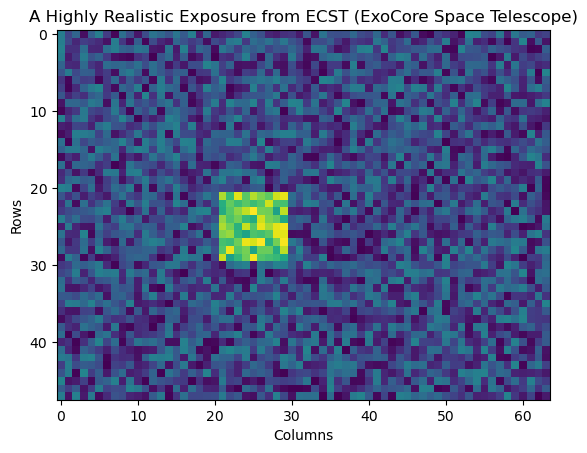

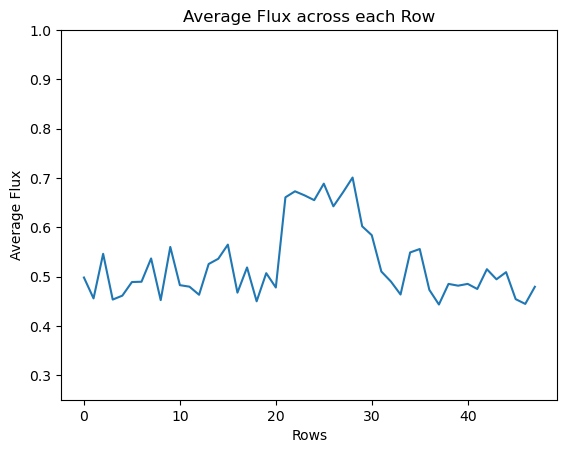

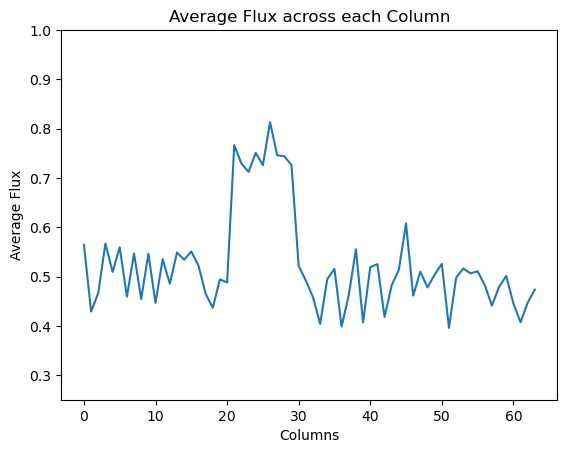

In [8]:
from matplotlib import pyplot as plt

#Start with random noise on a 48 x 64 grid
image = np.random.rand(48, 64)

## Creating insert the signal into the image. Note the bounds the signal is injected into, and how rows/columns are iterated over by two for loops
for rows, value in enumerate(image):
    for columns, value in enumerate(value):
        if columns > 20 and columns < 30 and rows > 20 and rows < 30:
            image[rows][columns] += 1.25


average_flux_columns = []
average_flux_rows = []
#The first for loop will have a 1D, 64 long array as the variable 'rows,' which we take the average of and append to our list above
for rows in image:
    average_flux_rows.append(np.average(rows))

#Here's a trick: to iterate over columns instead of rows, simply use the 'array.T' method, which transposes your array. That is, rows become columns, and vice versa
#and the dimensionality changes from 48x64 --> 64x48
for columns in image.T:
    average_flux_columns.append(np.average(columns))

##Show our image
plt.imshow(image)
plt.title('A Highly Realistic Exposure from ECST (ExoCore Space Telescope)')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()
plt.clf()

##Show the average flux of the rows as a function of columns
plt.ylim(0.25, 1)
plt.plot(range(0, len(average_flux_rows)), average_flux_rows)
plt.title('Average Flux across each Row')
plt.ylabel('Average Flux')
plt.xlabel('Rows')
plt.show()

##Show average flux of the columns as a function of rows
plt.ylim(0.25, 1)
plt.title('Average Flux across each Column')
plt.ylabel('Average Flux')
plt.xlabel('Columns')
plt.plot(range(0, len(average_flux_columns)), average_flux_columns)

The average flux as a function of both rows and columns can accurately define the location of our source! The peaks in either graph suggest that the source is centered with respect to rows, but slightly offset with respect to columns. We see this in the image!

### Handling NANS
Another important property of arrays is the ability to **mask** values that match a certain condition. (Learn all about masking support in `Numpy` [here](https://numpy.org/devdocs/reference/routines.ma.html)). Of particular concern are masking `NANS` from datasets, which occur frequently, and will often break your analysis methods if they are left in. Let's use conditionals to mask out `NANS` in a hypothetical light curve.

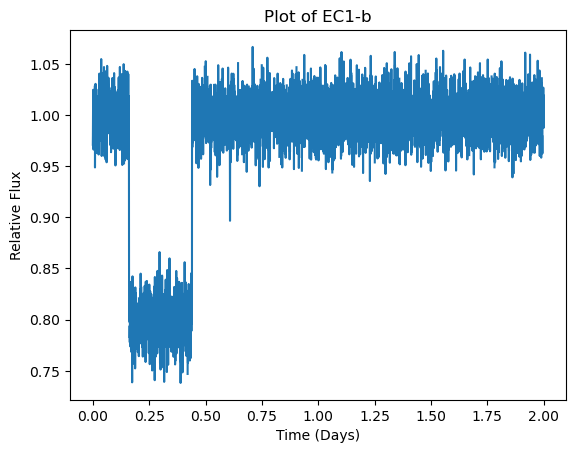

In [9]:
#Generate a time array using linspace
time = np.linspace(0, 2, num = 5000)

#Generate fluxes which we start as all 1's
flux = np.ones(5000)
for index, data in enumerate(flux):
    #Randomly check if we should make the current value a NAN
    nan_check = np.random.random()

    #Add some Gaussian noise
    flux[index] = flux[index] + np.random.normal(scale=0.02)

    #Add a 'transit'
    if index > 400 and index < 1100:
        flux[index] = flux[index] - 0.2
    #The check if the value should be made a nan, which is a 5% chance right now
    if nan_check < 0.05:
        flux[index] = np.nan

##Plot the result
plt.plot(time, flux)
plt.xlabel('Time (Days)')
plt.ylabel('Relative Flux')
plt.title('Plot of EC1-b')
plt.show()


As we can see, we have simulated a transit for ExoCore1 b, but there are several spots with missing data. If we try to compute the baseline to fit our models, we run into trouble.

In [10]:
#This function checks a value to see if it's a nan or not
def nan_checker(value):
    if np.isnan(value) == True:
        print('No good! NANS!')
    elif np.isnan(value) == False:
        print('All good! No NANS!')

## Compute the baseline after the transit for modeling
baseline = np.average(flux[100:])
nan_checker(baseline)
print(baseline)

No good! NANS!
nan


As we can see, trying to find the median flux for our model returns a `NAN`. To solve this issue, we incorporate the function `np.isfinite()`. This creates a Boolean array, using `True` if it is not a `NAN`, and `False` if it is. We can then pass it through our previous array, and the resulting array will remove any present `NAN` elements. 

<div class="alert alert-block alert-info">

**NOTE**: When masking **NANS**, it is important to mask any other relevant arrays associated with those data points, such as time, error, etc. Otherwise, your data will have *dimensionality mismatches*, and if not handled properly, data can be *incorrectly assigned or ignored*. This can be done by applying the same syntax **other_array[np.isfinite(flux_array_with_nanas)]** to the other arrays in your data. If the other arrays also have **NANS**, this process should be repeated for all relevant arrays.

All good! No NANS!
5000 4737


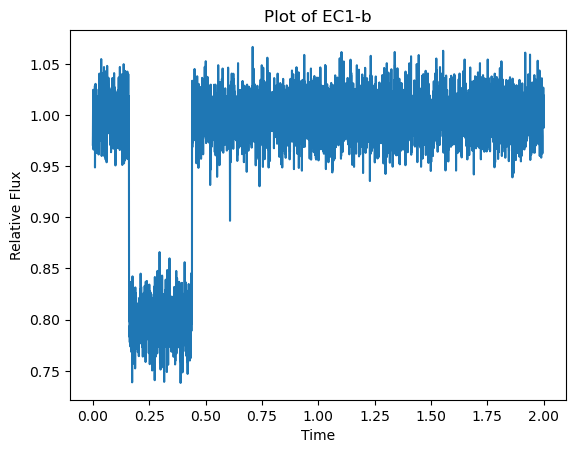

In [11]:
## Masking the data associated with NANS found in the flux array to both the NANS in the flux array, and the elements corresponding to those NANS in the time array
new_time = time[np.isfinite(flux)]
new_flux = flux[np.isfinite(flux)]

## Check to see if we succeeded. Note how we are slicing the array after the transit!
baseline = np.average(new_flux[100:])
nan_checker(baseline)

##Show the dimensionality differences between new and old array
print(len(flux), len(new_flux))


##Plot the result
plt.plot(new_time, new_flux)
plt.xlabel('Time')
plt.ylabel('Relative Flux')
plt.title('Plot of EC1-b')
plt.show()

### Stacking and Exporting Arrays

Often times we want to export multiple 1D arrays to a commonly readable file, such as `.csv`. Numpy has a few methods supporting this, but with some caveats:
- Multiple arrays can stacked into columns or rows, particularly useful for 1D data
- Stacking and exporting requires the arrays to have the **same shape** and **same data type**

This is often sufficient for simple cases, but can suffer in user readability since numerical columns cannot easily have string headers. [Pandas DataFrames](https://pandas.pydata.org/docs/reference/frame.html), which has its own [lesson](Pandas.ipynb), has more robust handling for these situations; however, stacking and exporting Numpy arrays is typically more user-friendly than DataFrames, which is why we will cover both cases.

<ErrorbarContainer object of 3 artists>

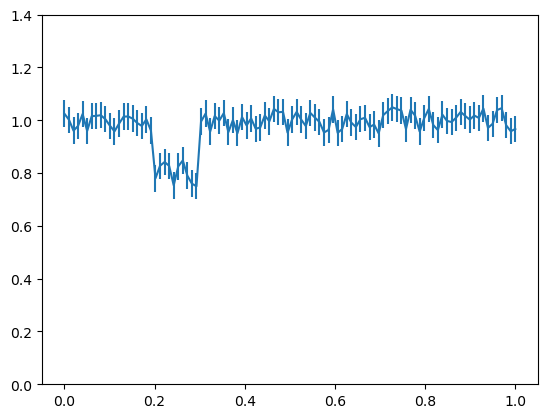

In [12]:
time = np.linspace(0, 1, num = 100)
flux = np.random.rand(len(time))/10 + 0.95
flux[20:30] = flux[20:30] - 0.2
error = np.ones(len(flux))*0.05
plt.ylim(0, 1.4)
plt.errorbar(time, flux, yerr=error)

To export our data as a 3-column `.csv`, we would need to use `np.vstack` on all three of our 1D arrays, **transpose**, then pass `np.savetext` delimited by a comma.

In [13]:
#Note the double parentheses! vstack takes a tuple as its argument of the arrays to be stacked. Also note the transpose! vstack as it is will save each data frame as a row,
#so transposing makes each array a column
X = np.vstack((time, flux, error)).T

#The first argument is the directory and file name. As it is now, it will save the file in the current directory
np.savetxt("Data.csv", X, delimiter=',')

What if we wanted to export the [image](#example-analyzing-a-2d-image) from before?

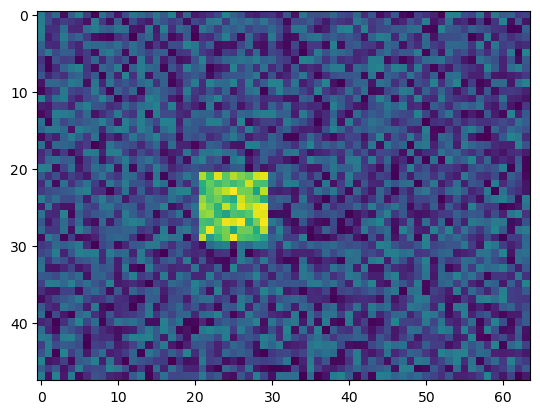

In [14]:
#Simple! Just save it as is
np.savetxt("Image.csv", image, delimiter=',')

#To convince yourself this worked, we can read it back in using np.genfromtxt
import_image = np.genfromtxt("Image.csv", delimiter=',')
plt.imshow(import_image)

### Sorting & Searching
Often times when working with data it is useful to be able to sort and search in particular ways. This brief section will go over some available functions relevant to these in `Numpy`.

In [15]:
##Sorting methods
data = np.random.normal(10, 1, 10)
print(data)
#In ascending order
data = np.sort(data)
print(data)
#Descending order. Negatives will sort it in ascending order, then applying another negative gives the original array back in descending order
data = -np.sort(-data)
print(data)
#In-place sorting
data.sort()
print(data)

##Searching methods
data = np.random.normal(10, 1, 10)
print(data)
#Gives index of largest argument
x= data.argmax()
print(x, data[x])
#Ibid for minimum
a= data.argmin()
print(a, data[a])
#Return elements if they satisfy certain condition(s)
print(np.where(data < 10), data[np.where(data < 10)])

[ 8.49540422 11.31407252 10.26908113 11.95068723 10.12152163  9.47486443
 10.01496062  8.32326494 10.51800185 10.77586666]
[ 8.32326494  8.49540422  9.47486443 10.01496062 10.12152163 10.26908113
 10.51800185 10.77586666 11.31407252 11.95068723]
[11.95068723 11.31407252 10.77586666 10.51800185 10.26908113 10.12152163
 10.01496062  9.47486443  8.49540422  8.32326494]
[ 8.32326494  8.49540422  9.47486443 10.01496062 10.12152163 10.26908113
 10.51800185 10.77586666 11.31407252 11.95068723]
[10.14452768 11.37078292  9.78540739  9.60800528 10.25991779 11.20486625
 10.03010706 10.67113116  9.95994646 11.79630967]
9 11.796309670482435
3 9.608005277669484
(array([2, 3, 8]),) [9.78540739 9.60800528 9.95994646]


## Mathematical Routines
[Here](https://numpy.org/devdocs/reference/routines.html) is the official documentation on `Numpy` routines!

This section will cover the important mathematical routines present in `Numpy`. This is not exhaustive, but will cover some of the most useful functions and classes.

### Basic Mathematical Functions
These are your typical functions, like: $$\sin(x), \exp(x), \cosh(x), \ln(x) \cdots$$ If it exists, there is a good chance `Numpy` supports it! Since there is a long list, we will not enumerate these functions here. The [documentation](https://numpy.org/devdocs/reference/routines.math.html) for all supported functions described them in depth.

### Statistics
`Numpy` provides highly efficient and convenient functions to find basic statistics of e.g. arrays. Here are some examples and a demonstration.

49.987684674067175
1.0035006938807325 1.0070136426191114
47.60079458341805 51.61907308086698


<>:26: SyntaxWarning: invalid escape sequence '\s'
<>:28: SyntaxWarning: invalid escape sequence '\s'
<>:30: SyntaxWarning: invalid escape sequence '\s'
<>:26: SyntaxWarning: invalid escape sequence '\s'
<>:28: SyntaxWarning: invalid escape sequence '\s'
<>:30: SyntaxWarning: invalid escape sequence '\s'
/var/folders/xk/4vjxvd7n0zv8s0v_58402hcr0000gn/T/ipykernel_54573/3179634837.py:26: SyntaxWarning: invalid escape sequence '\s'
  plt.axvline(mu + sigma, color = 'red', linestyle = '--', label = '1$\sigma$')
/var/folders/xk/4vjxvd7n0zv8s0v_58402hcr0000gn/T/ipykernel_54573/3179634837.py:28: SyntaxWarning: invalid escape sequence '\s'
  plt.axvline(mu + 2*sigma, color = 'green', linestyle = '--', label = '2$\sigma$')
/var/folders/xk/4vjxvd7n0zv8s0v_58402hcr0000gn/T/ipykernel_54573/3179634837.py:30: SyntaxWarning: invalid escape sequence '\s'
  plt.axvline(mu + 3*sigma, color = 'orange', linestyle = '--', label = '3$\sigma$')


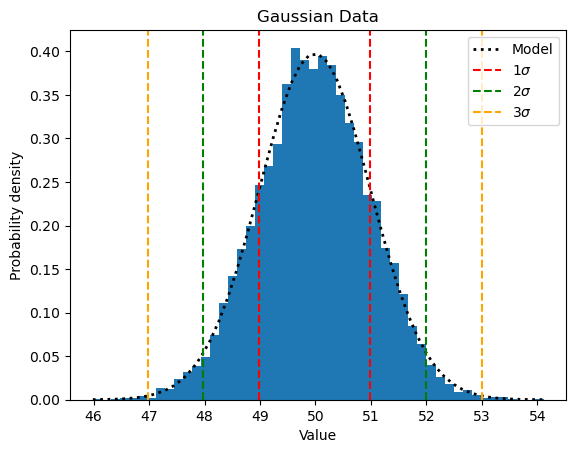

In [16]:
#Draw random Gaussian points with mean 50, standard deviation of 1 
mu, sigma = 50, 1
data = np.random.normal(mu, sigma, 10000)
#Verify mean
mu = np.mean(data)
#Standard Deviation + Variance
sigma = np.std(data)
sigma2 = np.var(data)
#Percentiles, 95th in this example
p = np.percentile(data, 0.95)
#Quantiles, 95th in this example
q = np.quantile(data, 0.95)
print(mu)
print(sigma, sigma2)
print(p, q)

##Create histogram of data, using probability density as opposed to counts
count, bins, ignored = plt.hist(data, bins=50, density = True)

##Plot the model to compare to
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='black', linestyle=':', label = 'Model')

##Show lines marking off different stanard deviations of the distribution
plt.axvline(mu + sigma, color = 'red', linestyle = '--', label = '1$\sigma$')
plt.axvline(mu - sigma, color = 'red', linestyle = '--')
plt.axvline(mu + 2*sigma, color = 'green', linestyle = '--', label = '2$\sigma$')
plt.axvline(mu - 2*sigma, color = 'green', linestyle = '--')
plt.axvline(mu + 3*sigma, color = 'orange', linestyle = '--', label = '3$\sigma$')
plt.axvline(mu - 3*sigma, color = 'orange', linestyle = '--')
plt.xlabel('Value')
plt.ylabel('Probability density')
plt.title('Gaussian Data')
plt.legend()
plt.show()

`numpy.random` is one of the best sources for random number generation (RNG). If you need to implement e.g. Monte Carlo methods from scratch, it's an excellent choice. `Numpy`'s statistic support is largely confined to the normal distribution. The [lesson](./Scipy.ipynb) on [Scipy](https://docs.scipy.org/doc/scipy/index.html) discusses other distributions, like Poisson and log-normal, that are highly relevant to astronomy and astrophysics research.

### Linear Algebra
The last class of methods in this lesson is for linear algebra methods. As mentioned in the prelude, arrays are based on matrices, and consequently many methods performed on matrices (e.g. finding eigenvalues, eigenvectors, determinants, etc.) are supported by `Numpy`. If some of these topics do not sound familiar, here is an excellent [reference](https://tutorial.math.lamar.edu/classes/de/la_eigen.aspx), and here is the [documentation](https://numpy.org/devdocs/reference/routines.linalg.html) for the functions not covered here.

In [17]:
A = np.array(([1, 3, 4], [5, 6, 7], [8, 9, 4]))
B = np.array(([6, 5, 7], [4, 0, 2], [4, 11, 12]))
#Compute the determinant, only on square arrays
print(np.linalg.det(A))
#Compute the trace
print(np.trace(A))
#Compute the inverse matrix
print(np.linalg.inv(A))
#Matrix Multiplication
print(np.matmul(A, B))

#Eigenvalues and eigenvectors, only on square arrays
values, vectors = np.linalg.eig(A)
print(values, vectors)

C = np.array([1, 5, 12])
D = np.array([5, 10, 22])
#Compute the norm of a vector
print(np.linalg.norm(C))
#Compute the inner (dot) product of two vectors
print(np.dot(C, D), np.inner(C,D))
#Outer product
print(np.outer(C,D))
#Cross product of 1D vectors
print(np.cross(C,D))


56.99999999999996
11
[[-0.68421053  0.42105263 -0.05263158]
 [ 0.63157895 -0.49122807  0.22807018]
 [-0.05263158  0.26315789 -0.15789474]]
[[ 34  49  61]
 [ 82 102 131]
 [100  84 122]]
[15.97936546 -0.86751759 -4.11184787] [[-0.3150559  -0.66528722 -0.43776955]
 [-0.64573407  0.71230992 -0.35528099]
 [-0.69553382 -0.22362355  0.82591358]]
13.038404810405298
319 319
[[  5  10  22]
 [ 25  50 110]
 [ 60 120 264]]
[-10  38 -15]


Additionally, `Numpy` can solve **systems of equations**. For instance, to solve the system `x0 + 5 * x1 = 12` and `14 * x0 + 2 * x1 = 2`:

In [18]:
#Coefficients
a = np.array([[1, 5],[14, 2]])
#Equal to
b = np.array([12, 2])
x = np.linalg.solve(a, b)
print(x)

[-0.20588235  2.44117647]


## Exercises
To help solidify your understanding of `Numpy`, here are some exercises.

### Problem 1: Creating an Array in Four Different Ways
Generate a 1D array with length 100, starting from 0 in increments of 2, up to 200, in the following ways:
- Using a `for` loop, lists, and the `range()` function
- Using `np.ones()`
- Using `np.linspace`
- Using `np.arange`
Make sure each dtype is float! Compare the contents of each one using `np.array.all()`, and return `True` if all four are identical.

In [19]:
###Codespace for Problem 1

### Problem 2: Handling NANs
Write a function that takes in any number of `Numpy` arrays of the same length, and returns the same 1D arrays with `NANs` removed **across identical indices**. That is, if a `NAN` occurs at index 5 for list1, remove index 5 across all lists, such that all returned lists are the same length. Check your results by using the `nan_checker()` function.

In [20]:
###Codespace for Problem 2

### Problem 3: Modeling Ingress and Egress
When generating data for the example lightcurve of EC-1 b, we assumed a very simplistic model of an exoplanet transit that ignores the 'ingress' and 'egress,' the time when the planet enters/exits the cross-section of its host with respect to our line-of-sight. Our model is very 'boxy', with no smooth transition from non-transitting to transitting. We can try to improve on this through linear interpolation. 

**By modifying the `time` and `flux` arrays from the EC-1 b example, model a one hour ingress/egress by linearly interpolating from the baseline flux to the transit-depth flux. HINT: Look at the code to figure out the transit depth!**

**NOTE: The `time` array is in days, so be sure to convert!**

In [21]:
###Codespace for Problem 3